<a href="https://colab.research.google.com/github/ikhwandio4/PCVK_Ganjil_2024/blob/main/pcvk_modul_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Ikhwandi

Nim : 2241720028

kelas :3F

Matkul :pcvk

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

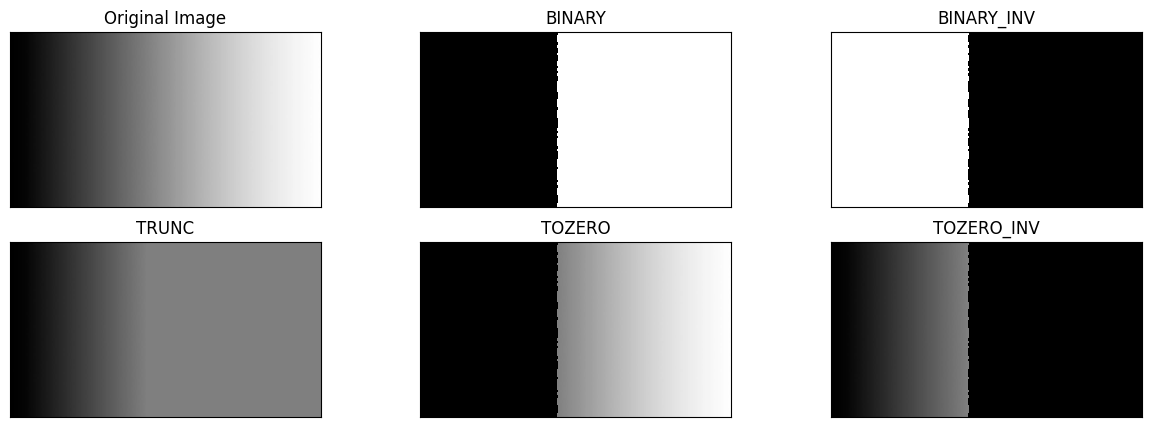

In [3]:
filename = ('/content/drive/MyDrive/pcvk/gradient.jpg')
img = cv2.imread(filename) # Make sure cv2 is used (was cv)
thresh = 127 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY) # Make sure cv2 is used (was cv)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY_INV) # Make sure cv2 is used (was cv)
#3. Threshold Truncate
ret,thresh3 = cv2.threshold(img,thresh,255,cv2.THRESH_TRUNC) # Make sure cv2 is used (was cv)
#4. Threshold Tozero
ret,thresh4 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO) # Make sure cv2 is used (was cv)
#5. Threshold Tozero Inverse
ret,thresh5 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO_INV) # Make sure cv2 is used (was cv)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
    # Indent the lines within the for loop
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

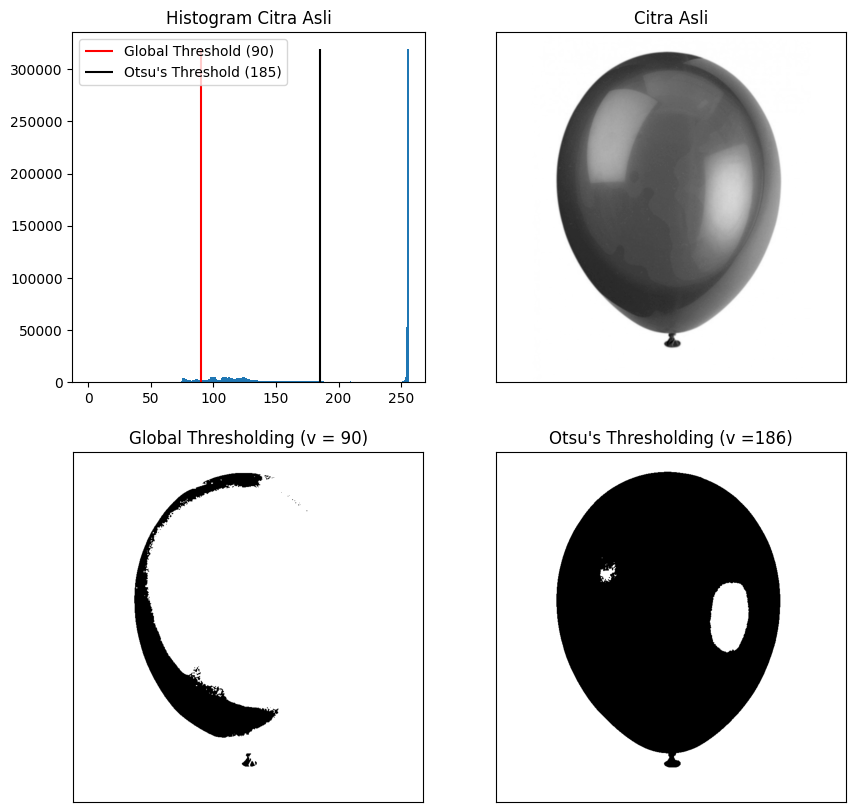

In [4]:
# Fungsi untuk Otsu Thresholding tanpa library
def otsu_threshold(image):
    # Inisialisasi variabel
    hist, _ = np.histogram(image.ravel(), bins=256, range=(0, 256))
    total = image.size
    current_max, threshold = 0, 0
    sum_total, sum_foreground = 0, 0
    weight_background, weight_foreground = 0, 0

    # Total intensitas piksel
    for i in range(256):
        sum_total += i * hist[i]

    # Perhitungan untuk setiap threshold
    for i in range(256):
        weight_background += hist[i]         # Background weight
        if weight_background == 0:
            continue

        weight_foreground = total - weight_background   # Foreground weight
        if weight_foreground == 0:
            break

        sum_foreground += i * hist[i]      # Sum of intensities in foreground
        mean_background = sum_foreground / weight_background
        mean_foreground = (sum_total - sum_foreground) / weight_foreground

        # Variance antar kelas
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Cari threshold dengan variance antar kelas tertinggi
        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = i

    # Thresholding
    _, otsu_img = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return threshold, otsu_img, hist # Return hist along with other values


# Memuat gambar dan mengaburkan untuk mengurangi noise
filename = '/content/drive/MyDrive/pcvk/balloon.jpg'
image = cv2.imread(filename, 0)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Thresholding Global dan Otsu
global_thresh = 90
_, global_thresh_img = cv2.threshold(blurred, global_thresh, 255, cv2.THRESH_BINARY)
otsu_thresh, otsu_img, hist = otsu_threshold(blurred) # Receive hist from the function call


# Plot hasil
plt.figure(figsize=(10,10))

# Histogram
plt.subplot(2, 2, 1)
plt.hist(blurred.ravel(), 256, [0, 256])
plt.vlines(global_thresh, 0, np.max(hist), colors='red', label='Global Threshold (90)')
plt.vlines(otsu_thresh, 0, np.max(hist), colors='black', label=f"Otsu's Threshold ({otsu_thresh})")
plt.title('Histogram Citra Asli')
plt.legend()

# Tampilkan gambar hasil thresholding
titles = ['Citra Asli', 'Global Thresholding (v = 90)', f"Otsu's Thresholding (v =186)"]
images = [blurred, global_thresh_img, otsu_img]

for i in range(len(images)):
    plt.subplot(2, 2, i + 2)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:
a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencv-
tutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

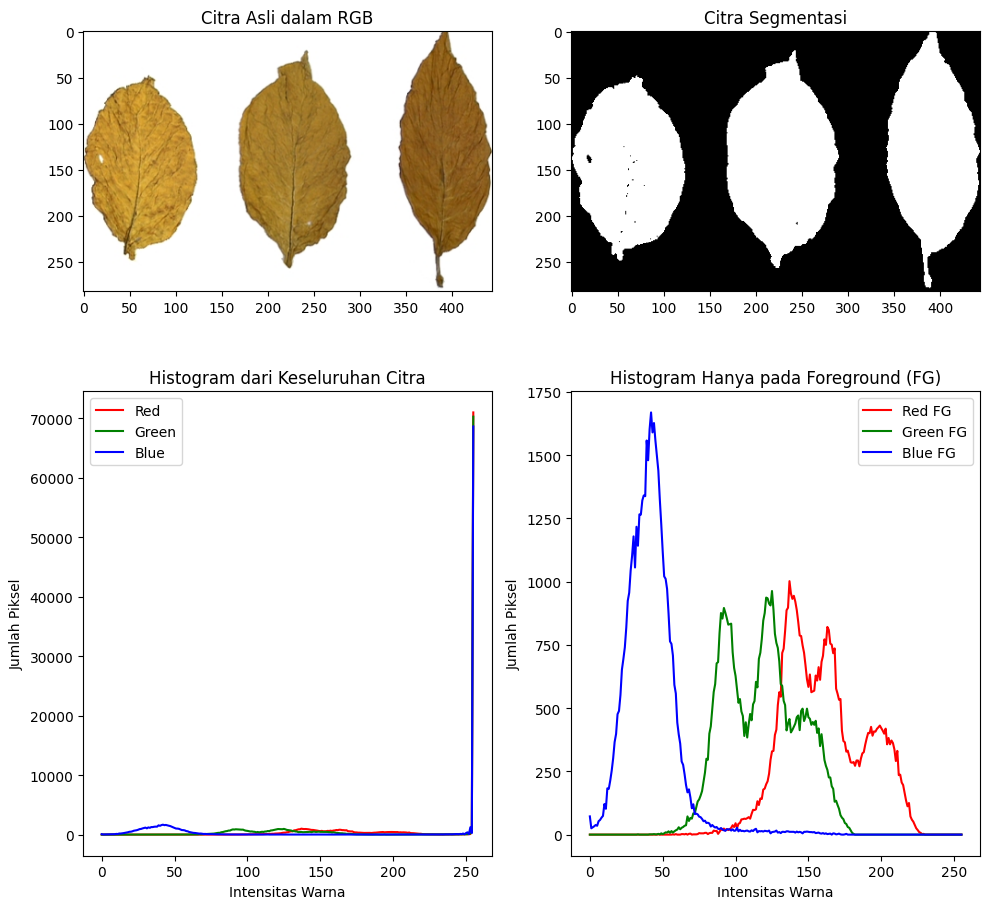

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt

# Langkah 1: Membaca gambar
filename = '/content/drive/MyDrive/pcvk/tobacco.jpg'
image = cv.imread(filename)  # Read the image using cv.imread
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert to RGB

# Langkah 2: Membuat mask untuk menandai foreground (dengan sedikit modifikasi nilai threshold)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)  # Use the loaded image
_, mask = cv.threshold(gray_image, 180, 255, cv.THRESH_BINARY_INV)  # Membalik foreground jadi putih

# Langkah 3: Hitung histogram keseluruhan citra untuk setiap channel RGB
hist_total_r = cv.calcHist([image], [2], None, [256], [0, 256])  # Use the loaded image
hist_total_b = cv.calcHist([image], [0], None, [256], [0, 256])  # Use the loaded image
hist_total_g = cv.calcHist([image], [1], None, [256], [0, 256])  # Use the loaded image

# Langkah 4: Hitung histogram hanya pada foreground dengan menggunakan mask (untuk setiap channel RGB)
hist_fg_r = cv.calcHist([image_rgb], [0], mask, [256], [0, 256])
hist_fg_g = cv.calcHist([image_rgb], [1], mask, [256], [0, 256])
hist_fg_b = cv.calcHist([image_rgb], [2], mask, [256], [0, 256])

# Langkah 5: Tampilkan hasilnya
plt.figure(figsize=(10, 10))

# Plot 1: Tampilkan citra asli dalam RGB
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Citra Asli dalam RGB')

# Plot 2: Tampilkan citra segmentasi dengan mask
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segmentasi')

# Plot 3: Histogram dari keseluruhan citra untuk setiap channel RGB
plt.subplot(2, 2, 3)
plt.plot(hist_total_r, color='r', label='Red')
plt.plot(hist_total_g, color='g', label='Green')
plt.plot(hist_total_b, color='b', label='Blue')
plt.title('Histogram dari Keseluruhan Citra')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Piksel')
plt.legend()

# Plot 4: Histogram hanya untuk foreground (FG) objek
plt.subplot(2, 2, 4)
plt.plot(hist_fg_r, color='r', label='Red FG')
plt.plot(hist_fg_g, color='g', label='Green FG')
plt.plot(hist_fg_b, color='b', label='Blue FG')
plt.title('Histogram Hanya pada Foreground (FG)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Piksel')
plt.legend()

plt.tight_layout()
plt.show()

Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

kesulitannya tidak bisa menampilkan objek yang berwarna kuning dengan sempurna

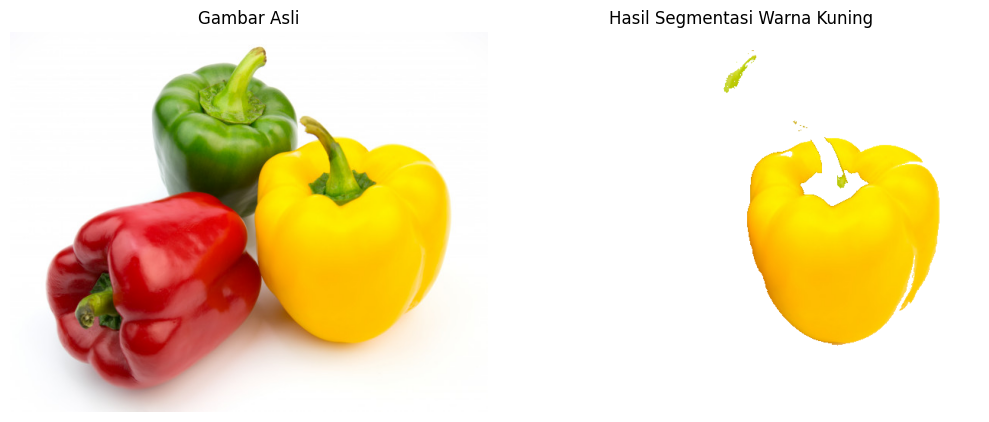

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Tahap 1: Memuat gambar dan mengonversi format warna
image_path = '/content/drive/MyDrive/pcvk/peppers.jpg'
image = cv.imread(image_path)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Mengonversi BGR ke RGB untuk ditampilkan dengan benar di Matplotlib

# Tahap 2: Mengubah gambar menjadi format 2D untuk K-Means clustering
pixels = image_rgb.reshape((-1, 3)).astype(np.float32)  # Mengubah gambar menjadi array 2D dan tipe float32

# Tahap 3: Menentukan jumlah cluster dan menerapkan K-Means clustering
k = 7  # Jumlah cluster
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv.kmeans(pixels, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Tahap 4: Rekonstruksi gambar dari hasil K-Means
segmented_image = centers[labels.flatten()].reshape(image_rgb.shape).astype(np.uint8)

# Tahap 5: Mengonversi gambar tersegmentasi ke ruang warna HSV untuk segmentasi warna kuning
hsv_image = cv.cvtColor(segmented_image, cv.COLOR_RGB2HSV)

# Menentukan batas warna kuning dalam ruang warna HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Membuat mask untuk warna kuning
yellow_mask = cv.inRange(hsv_image, lower_yellow, upper_yellow)

# Tahap 6: Menerapkan mask pada gambar asli untuk menyoroti warna kuning
highlight_yellow = cv.bitwise_and(image_rgb, image_rgb, mask=yellow_mask)

# Tahap 7: Mengganti latar belakang non-kuning dengan warna putih
white_background = np.full_like(image_rgb, 255)
segmented_with_white_bg = np.where(yellow_mask[:, :, np.newaxis] == 255, highlight_yellow, white_background)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('off')

# Menampilkan hasil segmentasi warna kuning dengan latar belakang putih
plt.subplot(1, 2, 2)
plt.imshow(segmented_with_white_bg)
plt.title('Hasil Segmentasi Warna Kuning')
plt.axis('off')

plt.tight_layout()
plt.show()


Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

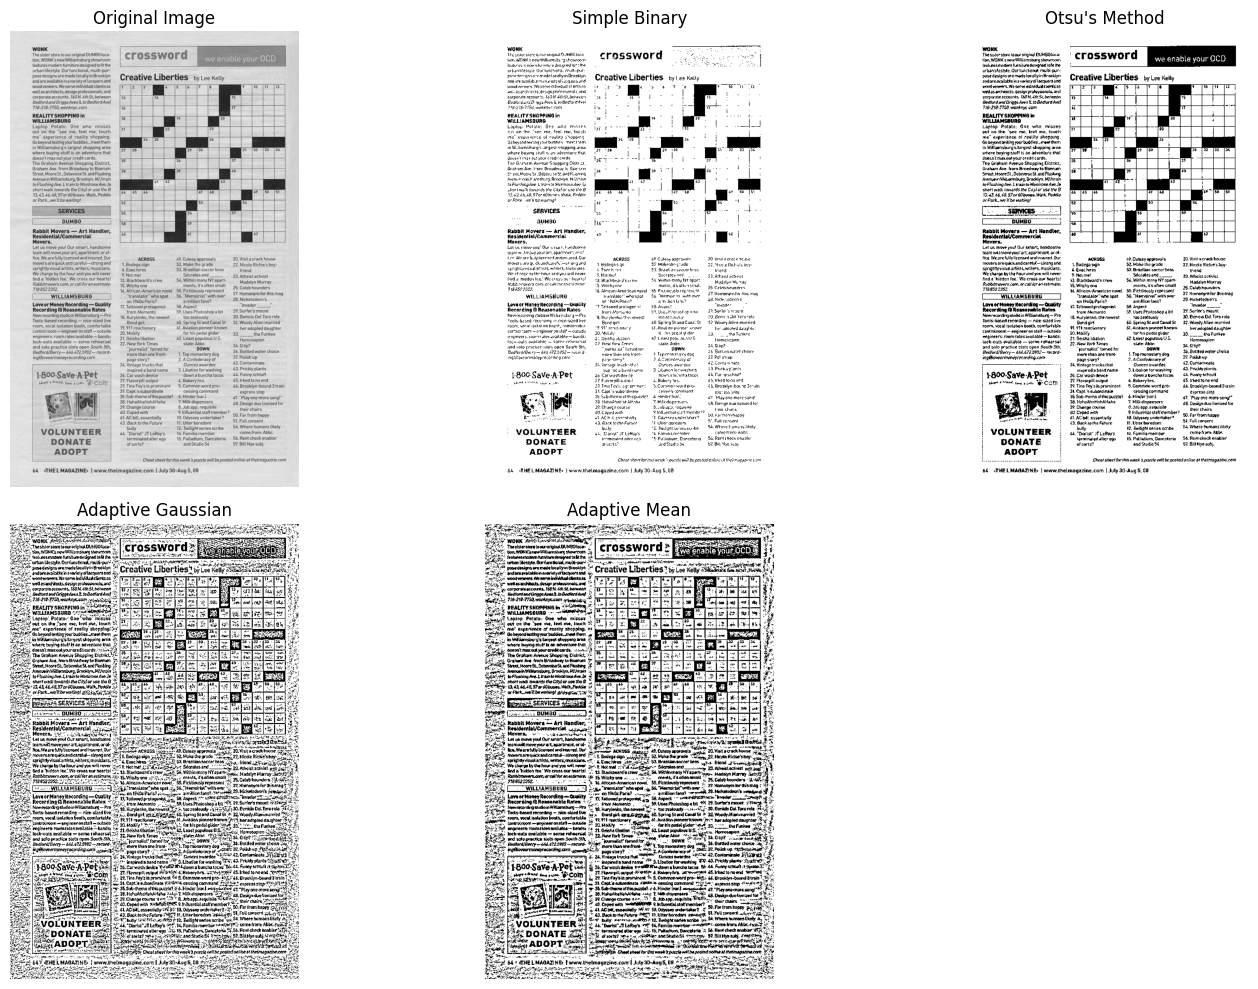

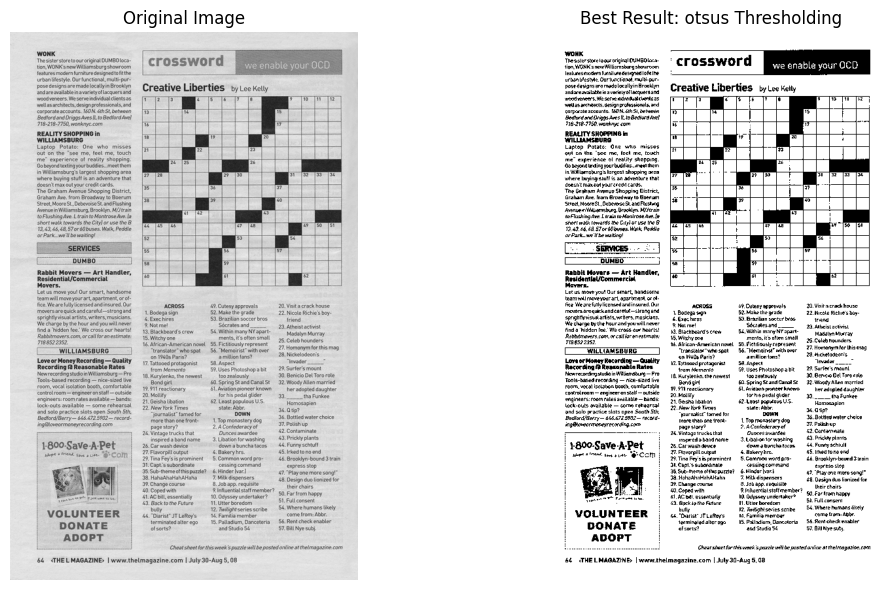

In [5]:
# Baca gambar
image = cv2.imread('/content/drive/MyDrive/pcvk/crossword.jpg', 0)  # Baca sebagai grayscale

# Terapkan berbagai metode thresholding
# 1. Simple Binary Thresholding
ret1, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 2. Otsu's Thresholding
ret2, thresh2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 3. Adaptive Gaussian Thresholding
thresh3 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2)

# 4. Adaptive Mean Thresholding
thresh4 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 11, 2)

# Tampilkan semua hasil
plt.figure(figsize=(15, 10))

# Gambar asli
plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Simple Binary Thresholding
plt.subplot(232)
plt.imshow(thresh1, cmap='gray')
plt.title('Simple Binary')
plt.axis('off')

# Otsu's Thresholding
plt.subplot(233)
plt.imshow(thresh2, cmap='gray')
plt.title("Otsu's Method")
plt.axis('off')

# Adaptive Gaussian Thresholding
plt.subplot(234)
plt.imshow(thresh3, cmap='gray')
plt.title('Adaptive Gaussian')
plt.axis('off')

# Adaptive Mean Thresholding
plt.subplot(235)
plt.imshow(thresh4, cmap='gray')
plt.title('Adaptive Mean')
plt.axis('off')

plt.tight_layout()
plt.show()

# Tampilkan hasil terbaik dengan ukuran lebih besar
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Hasil terbaik (otsu's)
plt.subplot(122)
plt.imshow(thresh2, cmap='gray')
plt.title('Best Result: otsus Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()